# EDA sur les classes animales du dataset CIFAR-10


In [74]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

from tensorflow.keras.datasets import cifar10

L'ensemble de données CIFAR-10 comprend 60 000 images couleur 32x32 reparties en 10 classes, avec 6000 images par classe. Dans ce projet nous nous concentrons uniquement sur les classes d'animaux, nous en avons 6 : oiseau, chat, cerf, chien, grenouille et cheval. 
Chaque pixel d'une image en couleur est codé par 3 canaux (R, G et B).



Ici, nous allons détailler le processus d'analyse exploratoire des données et de prétraitement des données. 


Nous chargeons le dataset en deux ensembles (test et entraînement) via l'api Kepas, chaque ensemble est chargé séparément afin de respecter la logique de séparation des données pour l'entraînement et l'évaluation du modèle. Nous filtrons les données avec uniquement les classes animales. 

In [75]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

animal_classes = [2, 3, 4, 5, 6, 7] 
class_names = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']

train_mask = np.isin(y_train_full, animal_classes).flatten()
test_mask = np.isin(y_test_full, animal_classes).flatten()

x_train = x_train_full[train_mask]
y_train = y_train_full[train_mask]
x_test = x_test_full[test_mask]
y_test = y_test_full[test_mask]

print(f"Train set : {x_train.shape[0]} images")
print(f"Test set : {x_test.shape[0]} images")


Train set : 30000 images
Test set : 6000 images


Ensuite, nous concaténons  les deux ensembles temporairement afin de réaliser une analyse exploratoire (EDA) complète sur l’ensemble des données.

In [76]:

x_full = np.concatenate([x_train_full, x_test_full], axis=0)
y_full = np.concatenate([y_train_full, y_test_full], axis=0)

print(f"Full dataset : {x_full.shape[0]} images")

animal_mask = np.isin(y_full, animal_classes).flatten()

x_animals = x_full[animal_mask]
y_animals = y_full[animal_mask]

print(f"Images d'animaux : {x_animals.shape[0]}")
print(f"Shape : {x_animals.shape}, Labels : {y_animals.shape}")

Full dataset : 60000 images
Images d'animaux : 36000
Shape : (36000, 32, 32, 3), Labels : (36000, 1)


Le dataset contient 60 000 images au total. Après avoir gardé seulement les classes d'animaux, il reste en 36 000.

## Visualisation des images

Nous allons afficher les 5 premières images de chaque classe, ainsi que 5 images sélectionnées aléatoirement, afin de visualiser le contenu du dataset.

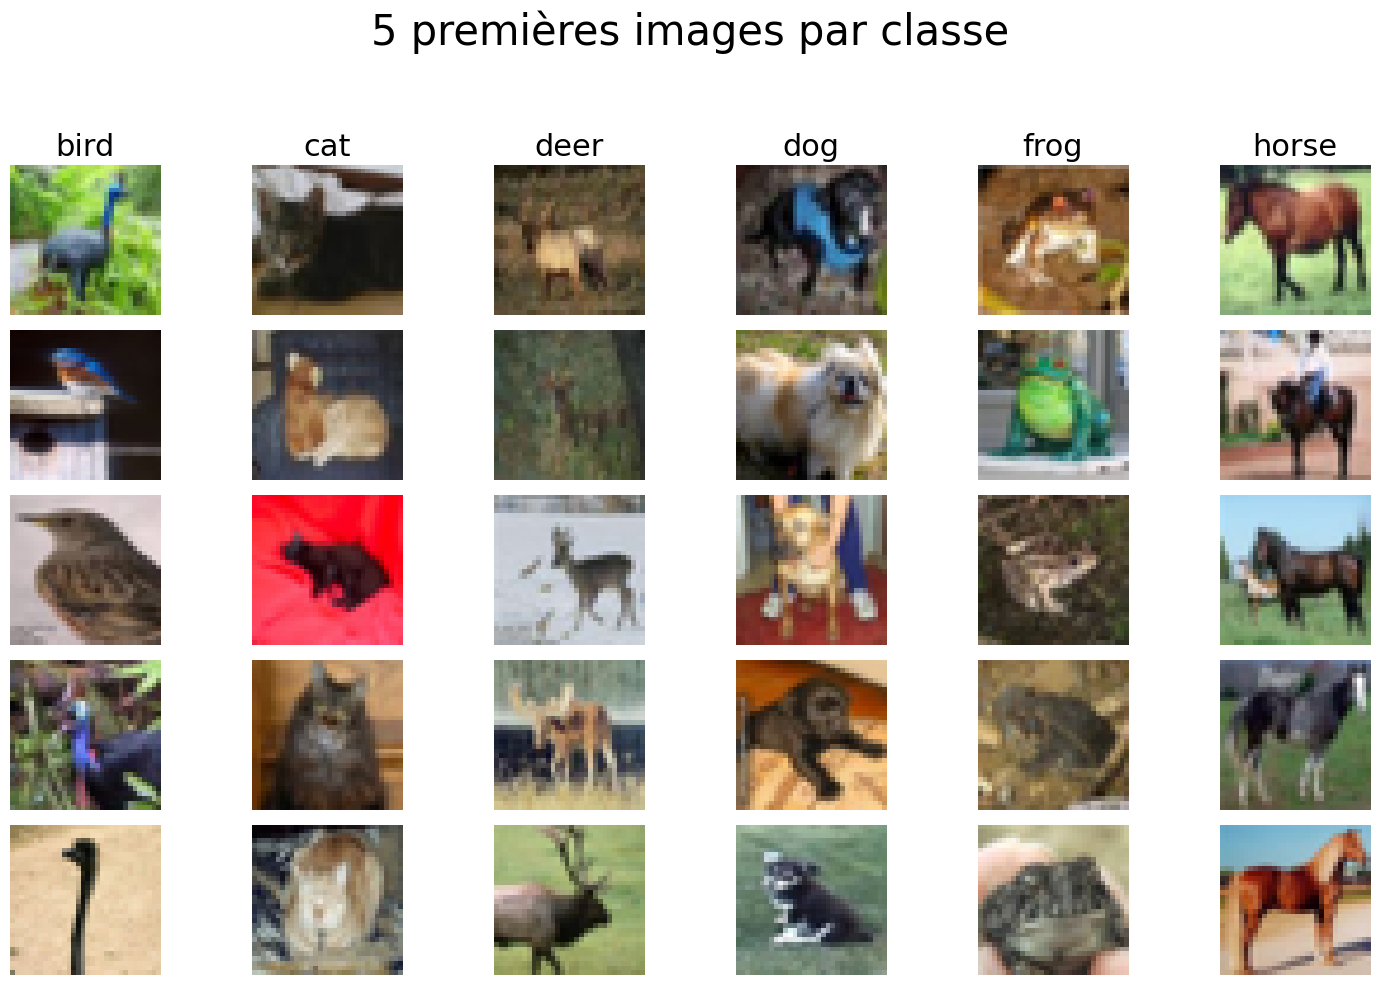

In [77]:
plt.figure(figsize=(15, 10))
plt.suptitle("5 premières images par classe", fontsize=30)

images_per_class = 5

for col, class_id in enumerate(animal_classes):
    class_indices = np.where(y_animals == class_id)[0][:images_per_class]
    
    for row, idx in enumerate(class_indices):
        plt_idx = row * len(animal_classes) + col + 1
        plt.subplot(images_per_class, len(animal_classes), plt_idx)
        plt.imshow(x_animals[idx])
        plt.axis('off')
        
        if row == 0:
            plt.title(class_names[col], fontsize=22)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


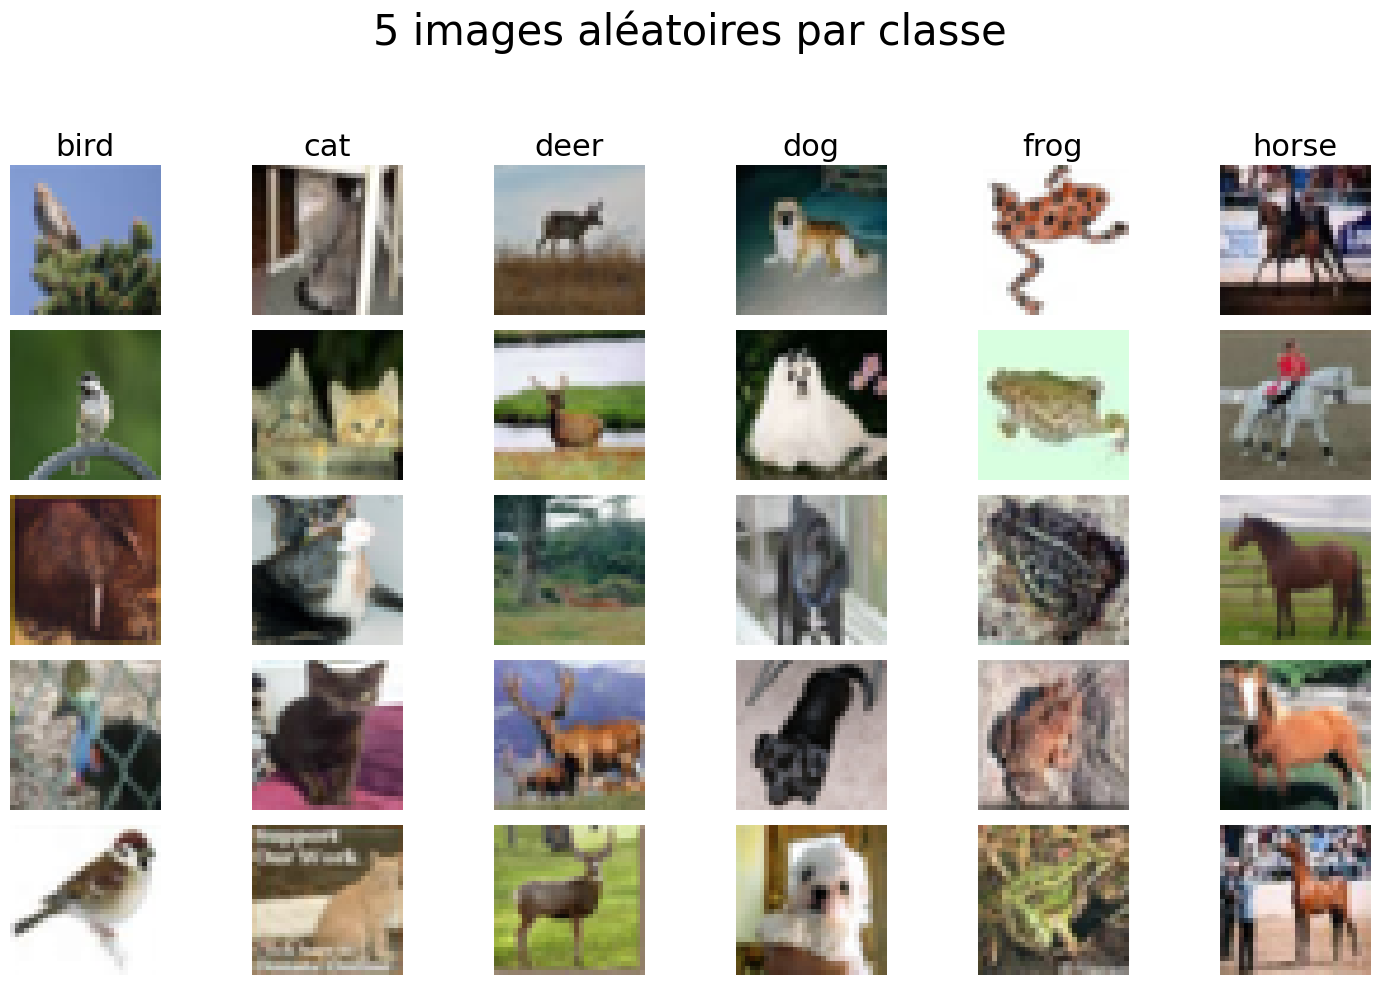

In [78]:
plt.figure(figsize=(15, 10))
plt.suptitle("5 images aléatoires par classe", fontsize=30)

images_per_class = 5

for col, class_id in enumerate(animal_classes):
    class_indices = np.random.choice(
        np.where(y_animals == class_id)[0], 
        size=images_per_class, 
        replace=False
    )
    
    for row, idx in enumerate(class_indices):
        plt_idx = row * len(animal_classes) + col + 1
        plt.subplot(images_per_class, len(animal_classes), plt_idx)
        plt.imshow(x_animals[idx])
        plt.axis('off')
        
        if row == 0:
            plt.title(class_names[col], fontsize=22)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

## Statistiques de base

### Dimensions et formats

In [79]:
print(f"Dimensions des images : {x_animals.shape[1:]}")  
print(f"Type des pixels : {x_animals.dtype}")          
print(f"Valeurs min : {x_animals.min()}") 
print(f"Valeurs max : {x_animals.max()}") 


Dimensions des images : (32, 32, 3)
Type des pixels : uint8
Valeurs min : 0
Valeurs max : 255


Chaque image est :

- de taille 32x32 pixels
- en couleurs RGB (3 canaux)

Les valeurs vont de 0 à 255, 0 représente pas de couleur (absence d'intensité) et 255 représente l'intensité maximale. 

### Doublons

Nous n'avons pas de doublons dans le dataset.

### Moyenne et ecart type des canaux

Nous allons calculer la moyenne et l'ecart type des 3 canaux. 

In [80]:
print("Moyenne des valeurs par canal :", np.mean(x_animals, axis=(0, 1, 2)))
print("Écart type des valeurs par canal :", np.std(x_animals, axis=(0, 1, 2)))

Moyenne des valeurs par canal : [124.51812646 118.92766021 101.95555417]
Écart type des valeurs par canal : [60.67778137 59.17781441 61.54651078]


Ici, la moyenne indiquent l'intensité lumineuse moyenne de chaque couleur, le canal rouge a une intensité légèrement plus élevée que les autres, suivi du vert puis du bleu.

l'écart type mesure la variabilité des intensités dans chaque canal. Les trois canaux ont des écart types assez proches (~60), ce qui indique une dispersion similaire des couleurs dans les images, et que chaque canal couvre une gamme assez large de valeurs. 

Cela reflètre bien la diversité des scènes presentes, avec differents types d'animaux représentés dans des environnements variés. C'est bénéfique pour l'entraînement d'un modèle robuste, car elle le pousse à apprendre des représentations générales plutôt que spécifiques à un contexte donnée. 

In [81]:
x_animals_reshaped = x_animals.reshape((x_animals.shape[0], -1))
_, unique_idx = np.unique(x_animals_reshaped, axis=0, return_index=True)
duplicates = x_animals.shape[0] - len(unique_idx)

print(f"Nombre de doublons exacts : {duplicates}")


Nombre de doublons exacts : 0


### IQR des intensités

L’IQR permet d’identifier à quel point les intensités des pixels sont concentrées ou étalées autour de la médiane. 

In [82]:
pixels = x_animals.flatten()
q25, q75 = np.percentile(pixels, [25, 75])
iqr = q75 - q25
print(f"Écart interquartile (IQR) des intensités : {iqr}")


Écart interquartile (IQR) des intensités : 90.0


Un IQR de 90 sur une échelle de 0 à 255 indique que la moitié centrale des intensités est étalée sur 35 % de l’échelle disponible, ce qui traduit une bonne richesse visuelle des images.

Pour mieux comprendre la diversité visuelle entre les classes, nous allons examiner la répartition de l’écart interquartile (IQR) des intensités par classe.

In [83]:
iqr_values = []

for class_id in animal_classes:
    x_class = x_animals[y_animals == class_id]
    pixels = x_class.flatten()
    q25, q75 = np.percentile(pixels, [25, 75])
    iqr = q75 - q25
    iqr_values.append(iqr)

plt.figure(figsize=(10, 6))
plt.bar(class_names, iqr_values, color='skyblue')
plt.title("Écart interquartile (IQR) des intensités par classe animale")
plt.xlabel("Classe")
plt.ylabel("IQR des intensités (0-255)")
plt.ylim(0, 130)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


IndexError: boolean index did not match indexed array along axis 1; size of axis is 32 but size of corresponding boolean axis is 1

L’analyse de l’IQR des intensités montre que les classes chat, chien et cheval présentent une plus grande variété de luminosité et de couleurs. Cela reflète une diversité d'environnements et de conditions visuelles, mais aussi une grande variabilité naturelle dans ces catégories : par exemple, la multiplicité des races de chiens ou la diversité de pelage des chats (blancs, noirs, tigrés, etc.).

À l’inverse, des classes comme cerf et grenouille affichent un IQR plus faible, ce qui suggère une palette de couleurs plus homogène. Cela est cohérent avec le fait que ces animaux arborent souvent des teintes spécifiques (marron pour les cerfs, vert pour les grenouilles), et sont fréquemment représentés dans des environnements similaires comme la forêt ou les zones humides.

Ces différences de dispersion visuelle peuvent avoir un impact sur la difficulté de classification et méritent d’être prises en compte dans l’analyse exploratoire ou la stratégie de traitement des données.


## Distribution des données

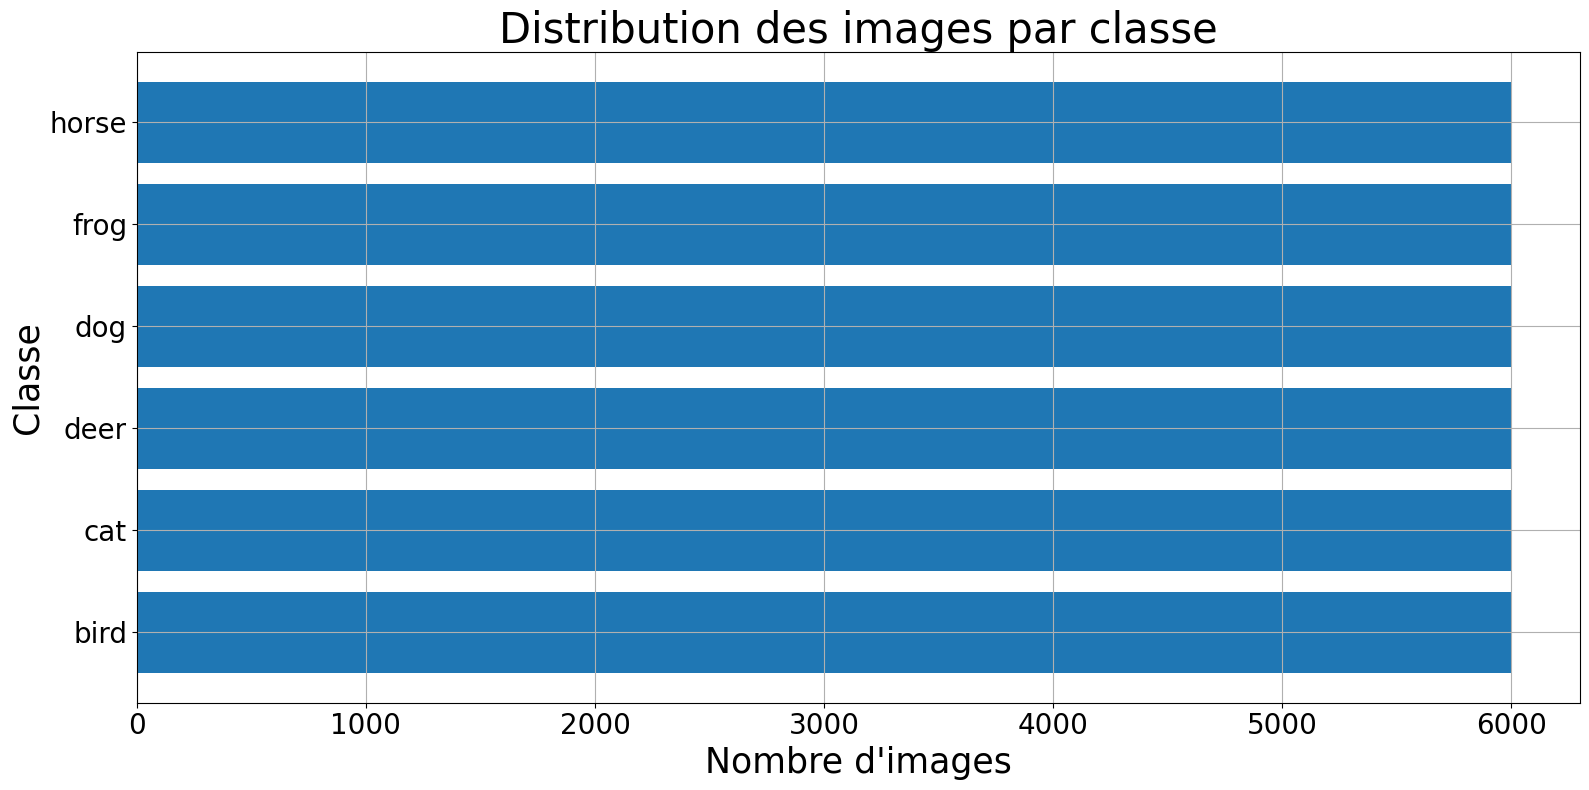

In [ ]:
classes, counts = np.unique(y_animals, return_counts=True)
plt.figure(figsize=(16, 8))
plt.barh(class_names, counts)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Distribution des images par classe", fontsize=30)
plt.xlabel("Nombre d'images", fontsize=25)
plt.ylabel("Classe", fontsize=25)

plt.grid(True)
plt.tight_layout()
plt.show()

Pour la distribution des images par classe, on peut confirmer qu'il y a 6 000 images par classe.

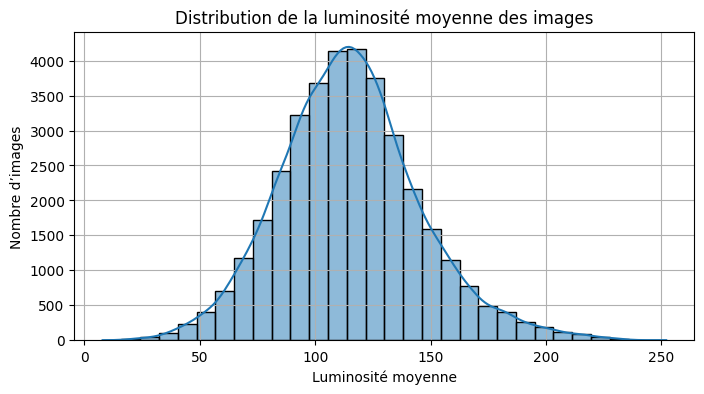

In [ ]:
brightness = x_animals.mean(axis=(1, 2, 3))
plt.figure(figsize=(8,4))
sns.histplot(brightness, bins=30, kde=True)
plt.title("Distribution de la luminosité moyenne des images")
plt.xlabel("Luminosité moyenne")
plt.ylabel("Nombre d’images")
plt.grid(True)
plt.show()



La distribution de la luminosité moyenne des images d’animaux suit une forme proche d’une loi normale, centrée autour de 110–120. Cela indique que les images sont, en moyenne, modérément éclairées, avec une bonne diversité visuelle.

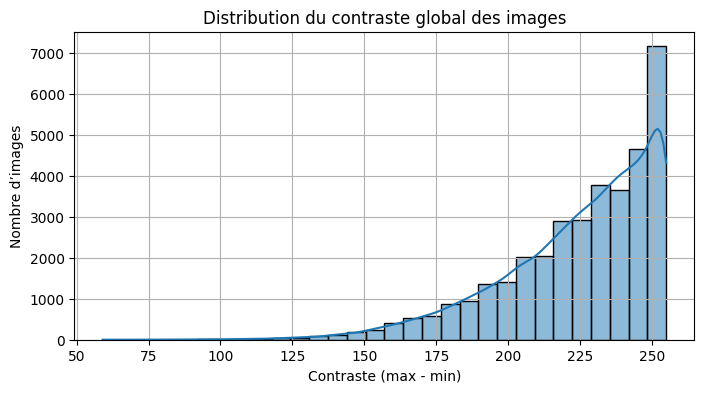

In [ ]:
contrast = x_animals.max(axis=(1, 2, 3)) - x_animals.min(axis=(1, 2, 3))
plt.figure(figsize=(8,4))
sns.histplot(contrast, bins=30, kde=True)
plt.title("Distribution du contraste global des images")
plt.xlabel("Contraste (max - min)")
plt.ylabel("Nombre d’images")
plt.grid(True)
plt.show()


Le contraste est très élevé pour la majorité des images, avec un pic proche de 255. Cela signifie que les images contiennent une grande variété d’intensités, facilitant la détection de formes, textures et contours par les modèles. Peu d’images sont ternes ou à faible contraste, ce qui confirme la bonne qualité visuelle globale du dataset.

Pour continuer la visualisations des données, nous allons normaliser les valeurs RGB (division par 255), pour les ramener dans une échelle [0, 1] ce qui va facilité la comparaison entre canaux, la visualisation intuitive mais surtout l'intégration future dans les modèles de machine learning. 

In [88]:
x_norm = x_animals.astype('float32') / 255.0


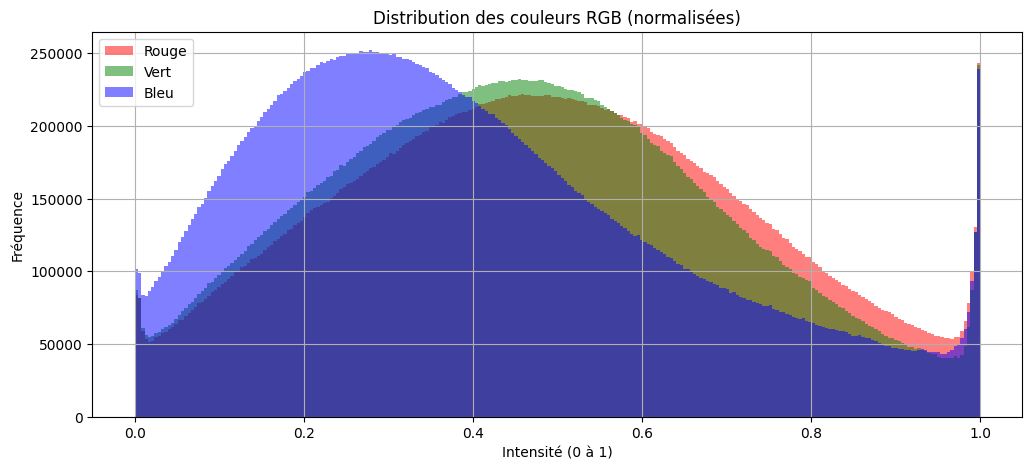

In [ ]:


r_vals = x_norm[:, :, :, 0].flatten()
g_vals = x_norm[:, :, :, 1].flatten()
b_vals = x_norm[:, :, :, 2].flatten()

plt.figure(figsize=(12, 5))

plt.hist(r_vals, bins=256, color='red', alpha=0.5, label='Rouge')
plt.hist(g_vals, bins=256, color='green', alpha=0.5, label='Vert')
plt.hist(b_vals, bins=256, color='blue', alpha=0.5, label='Bleu')

plt.title("Distribution des couleurs RGB (normalisées)")
plt.xlabel("Intensité (0 à 1)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()


La distribution des intensités RGB normalisées montre une répartition relativement équilibrée entre les canaux, avec une légère prédominance du bleu dans les tons sombres et du rouge dans les tons plus élevés. 

On observe que la plupart des pixels ont une intensité moyenne, entre 0.2 et 0.6, ce qui traduit une bonne balance lumineuse dans les images : elles ne sont ni trop sombres, ni trop claires.

Les pics observés aux extrémités (0 et 1) confirment la présence de zones très sombres et très lumineuses, contribuant au fort contraste global des images.

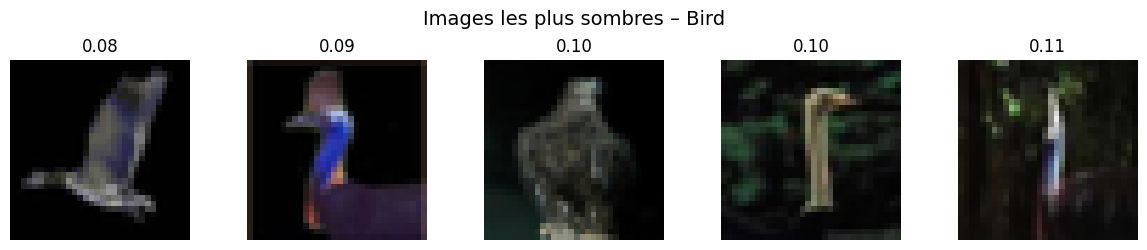

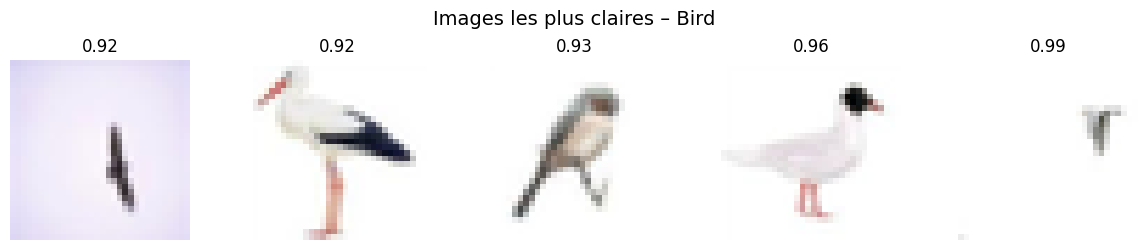

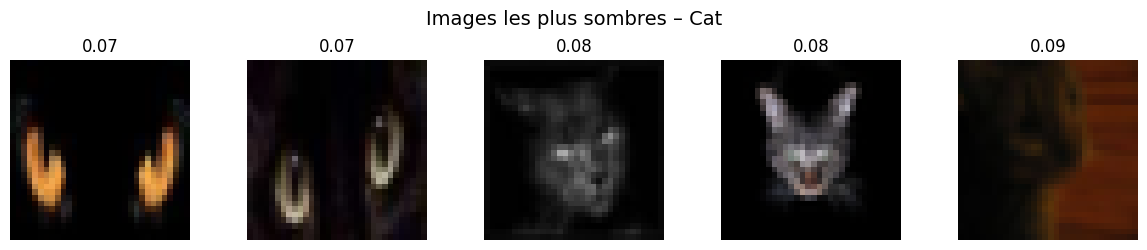

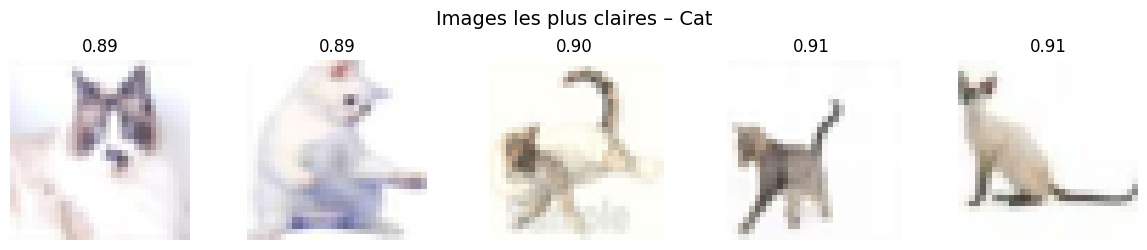

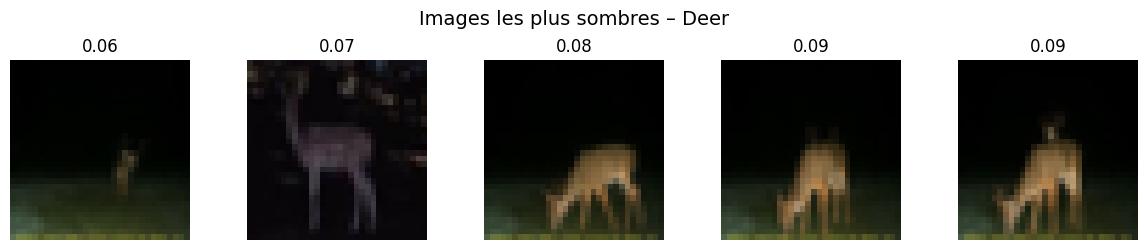

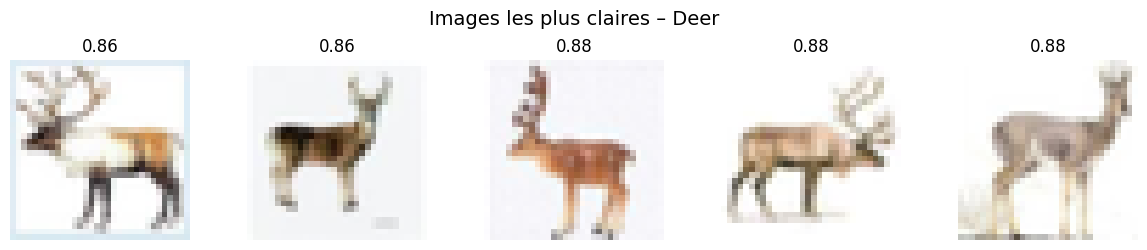

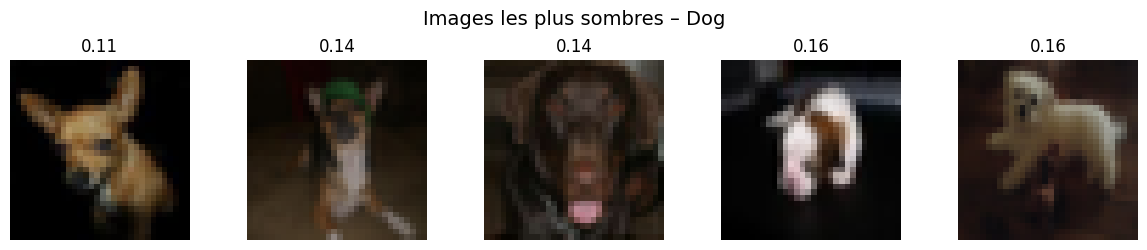

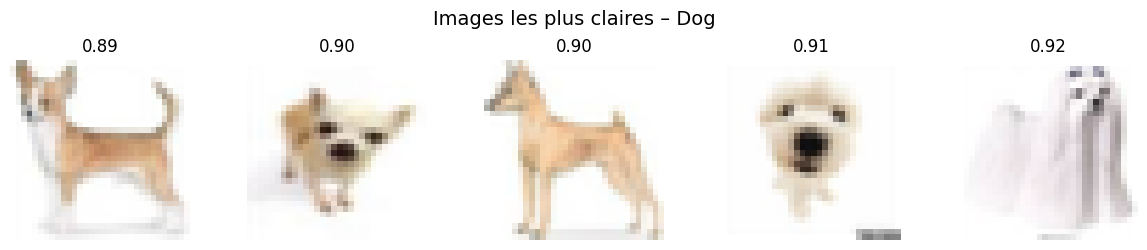

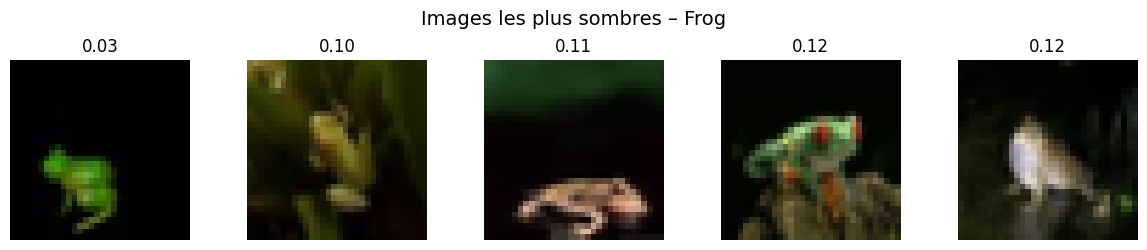

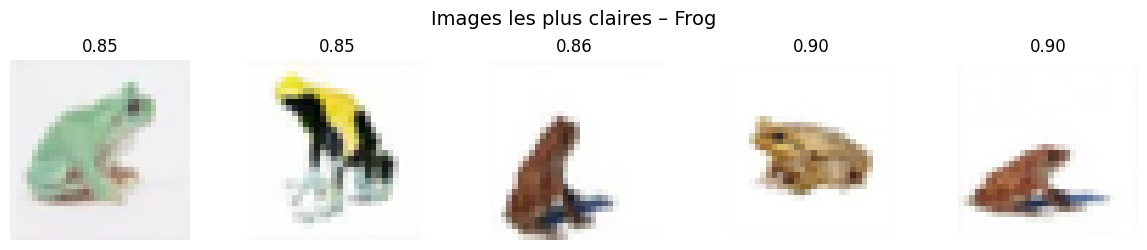

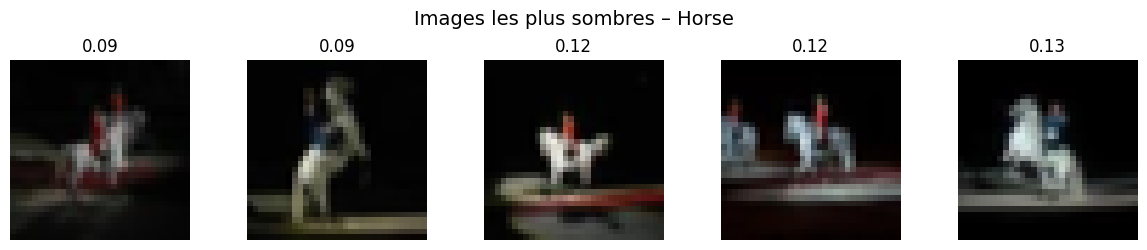

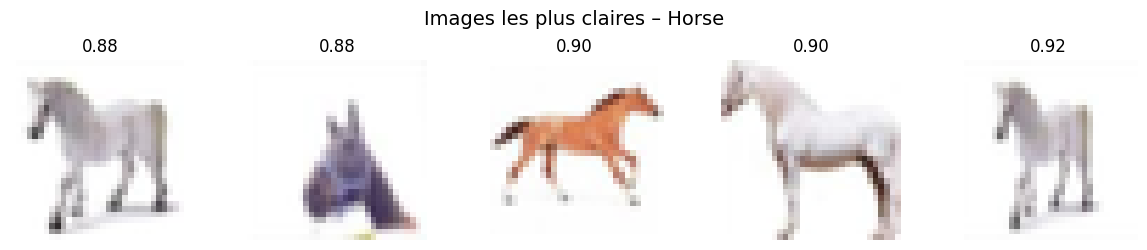

In [87]:
brightness = x_norm.mean(axis=(1, 2, 3))

for class_id, class_name in zip(animal_classes, class_names):
    class_indices = np.where(y_animals == class_id)[0]
    class_brightness = brightness[class_indices]
    
    darkest_idx = class_indices[np.argsort(class_brightness)[:5]]
    brightest_idx = class_indices[np.argsort(class_brightness)[-5:]]

    def show_images(indices, title):
        plt.figure(figsize=(12, 2.5))
        for i, idx in enumerate(indices):
            plt.subplot(1, 5, i+1)
            plt.imshow(x_norm[idx])
            plt.title(f"{brightness[idx]:.2f}")
            plt.axis('off')
        plt.suptitle(f"{title} – {class_name.capitalize()}", fontsize=14)
        plt.tight_layout()
        plt.show()

    show_images(darkest_idx, "Images les plus sombres")
    show_images(brightest_idx, "Images les plus claires")